In [2]:
pip install geopandas

     |████████████████████████████████| 962 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 14.7 MB 30.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 36.0 MB/s eta 0:00:01
     |████████████████████████████████| 10.9 MB 46.7 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import time
import os

In [4]:
fp = "USA_States.shp"

data_map = gpd.read_file(fp)

In [5]:
data_map.head()

STATE_NAME STATE_FIPS STATE_ABBR  \
0    Washington         53         WA   
1       Montana         30         MT   
2         Maine         23         ME   
3  North Dakota         38         ND   
4  South Dakota         46         SD   

                                            geometry  
0  MULTIPOLYGON (((-122.40202 48.22522, -122.4628...  
1  POLYGON ((-111.47543 44.70216, -111.48080 44.6...  
2  MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...  
3  POLYGON ((-98.73044 45.93827, -99.00683 45.939...  
4  POLYGON ((-102.78838 42.99530, -103.00588 42.9...

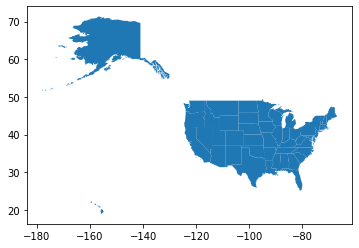

In [8]:
plot =data_map.plot()

fig = plot.get_figure()

In [7]:
pip install descartes

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
df=pd.read_csv('Covid19-USA-daily.csv')

In [10]:
len(df)

7353

In [11]:
df.head()

date state  positive  negative  pending  hospitalizedCurrently  \
0  20200714    AK    1579.0  147894.0      NaN                   25.0   
1  20200714    AL   57255.0  471834.0      NaN                 1353.0   
2  20200714    AR   29733.0  360566.0      NaN                  445.0   
3  20200714    AS       0.0     816.0      NaN                    NaN   
4  20200714    AZ  128097.0  593846.0      NaN                 3517.0   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                     NaN             NaN              NaN   
1                  7123.0             NaN            931.0   
2                  1872.0             NaN              NaN   
3                     NaN             NaN              NaN   
4                  5942.0           970.0              NaN   

   onVentilatorCurrently  ...  posNeg  deathIncrease hospitalizedIncrease  \
0                    1.0  ...  149473              0                    0   
1                    NaN  ...  529089             40                  378   
2                   91.0  ...  390299              8                   36   
3                    NaN  ...     816              0                    0   
4                  674.0  ...  721943             92                  103   

                                       hash commercialScore  \
0  14ec620d73185257a210b3f634cca1a8024dabe0               0   
1  820cd0cab43d1d4994f54d9f80d70d3ce3257dbe               0   
2  815df27dba712c14d4f70512eb9b4b6523a88525               0   
3  5fe9094de8fb3150e1522fdd21515350701f4636               0   
4  d6c2b3de47d952dae9beb085730d699788a6a0d9               0   

  negativeRegularScore  negativeScore  positiveScore score  grade  
0                    0              0              0     0    NaN  
1                    0              0              0     0    NaN  
2                    0              0              0     0    NaN  
3                    0              0              0     0    NaN  
4                    0              0              0     0    NaN  

[5 rows x 41 columns]

In [12]:
import csv
columnsCSV=['state']
states=[]

with open('Covid19-USA-daily.csv', newline='') as csvfileR:
    spamreader = csv.reader(csvfileR, delimiter=',', quotechar='|')
        
    data={}
    data['state']=[]   
    
    
    for row in spamreader:
        date=row[0]
        state=row[1]
        cases=row[2]
        if date not in columnsCSV:
            columnsCSV.append(date)
        
        if state not in states:
            states.append(state)
        if date not in data:
            data[date]=[]
            
        data[date].append(cases)
            
    columnsCSV.remove('date')
    states.remove('state')
    columnsCSV=columnsCSV[:91]
    del data['date']
    data['state']=states
        
    
    
        
    for row in spamreader:
        date=row[0]
        cases=row[2]
    
        

In [13]:
import itertools
clean_data=dict(itertools.islice(data.items(), 91))

In [14]:
len(clean_data)

91

In [15]:
df_final=pd.DataFrame.from_dict(clean_data)

In [16]:
df_final.to_csv("outputData.csv", index=False)

In [17]:
df_final=df_final[df_final.columns[::-1]]

In [18]:
len(df_final)

56

In [19]:
df_final.head()

20200416 20200417 20200418 20200419 20200420 20200421 20200422 20200423  \
0      300      309      314      319      321      329      335      337   
1     4345     4530     4655     4837     5025     5231     5465     5778   
2     1620     1695     1739     1781     1923     2227     2276     2465   
3        0        0        0        0        0        0        0        0   
4     4234     4507     4719     4929     5064     5251     5459     5769   

  20200424 20200425  ... 20200706 20200707 20200708 20200709 20200710  \
0      339      339  ...     1138     1184     1226     1272     1323   
1     5832     6137  ...    44878    45785    46962    49174    50508   
2     2741     2829  ...    24253    24512    24512    26052    26803   
3        0        0  ...        0        0        0        0        0   
4     6045     6280  ...   101441   105094   108614   112671   116892   

  20200711 20200712 20200713 20200714 state  
0     1385     1479     1539     1579    AK  
1    51947    53587    55545    57255    AL  
2    26803    28367    28939    29733    AR  
3        0        0        0        0    AS  
4   119930   122467   123824   128097    AZ  

[5 rows x 91 columns]

In [20]:
df_final.rename(columns={'state':'STATE_ABBR'},inplace=True)


In [21]:
df_total = pd.merge(data_map,df_final,on='STATE_ABBR')

In [22]:
df_total.head()

STATE_NAME STATE_FIPS STATE_ABBR  \
0    Washington         53         WA   
1       Montana         30         MT   
2         Maine         23         ME   
3  North Dakota         38         ND   
4  South Dakota         46         SD   

                                            geometry 20200416 20200417  \
0  MULTIPOLYGON (((-122.40202 48.22522, -122.4628...    12872    13174   
1  POLYGON ((-111.47543 44.70216, -111.48080 44.6...      415      422   
2  MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...      796      827   
3  POLYGON ((-98.73044 45.93827, -99.00683 45.939...      393      439   
4  POLYGON ((-102.78838 42.99530, -103.00588 42.9...     1311     1411   

  20200418 20200419 20200420 20200421  ... 20200705 20200706 20200707  \
0    13407    13583    13890    14133  ...    35247    35898    36985   
1      426      433      433      437  ...     1212     1249     1327   
2      847      867      875      888  ...     3415     3423     3440   
3      528      585      627      644  ...     3816     3849     3898   
4     1542     1635     1685     1755  ...     7063     7105     7163   

  20200708 20200709 20200710 20200711 20200712 20200713 20200714  
0    37420    37941    38581    39218    39218    40656    41757  
1     1371     1466     1593     1677     1758     1843     1952  
2     3460     3486     3499     3520     3539     3558     3566  
3     3971     4070     4154     4243     4334     4442     4493  
4     7242     7336     7401     7454     7499     7524     7572  

[5 rows x 94 columns]

In [23]:
len(df_final)

56

In [24]:
df_total["20200713"]= pd.to_numeric(df_total["20200713"]) 

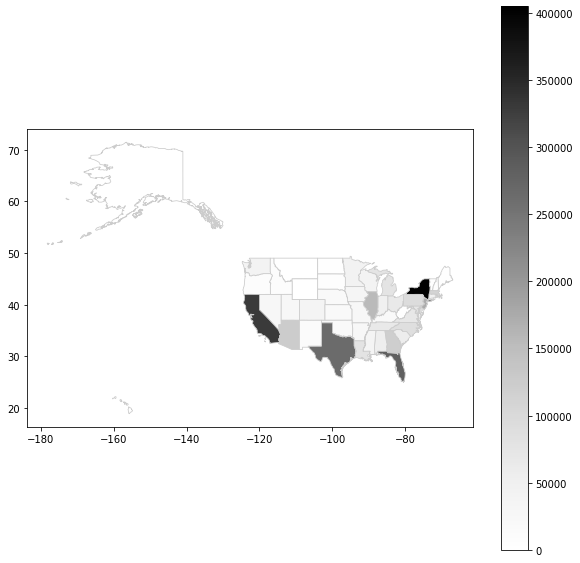

In [25]:
vmin, vmax = 0, 405000
fig = df_total.plot(column='20200713', cmap='Greys', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, 
                       legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))

In [26]:
columns_dates=df_total.columns
columns_dates=list(columns_dates)
columns_dates.remove('STATE_NAME')
columns_dates.remove('STATE_FIPS')
columns_dates.remove('STATE_ABBR')
columns_dates.remove('geometry')

In [27]:
for date in columns_dates:
    df_total[str(date)]= pd.to_numeric(df_total[str(date)]) 

In [28]:
df_total.describe()

20200416       20200417       20200418       20200419  \
count      51.000000      51.000000      51.000000      51.000000   
mean    13184.823529   13811.078431   14358.333333   14895.058824   
std     32641.865936   33770.414668   34852.417700   35823.005114   
min       296.000000     296.000000     305.000000     309.000000   
25%      1587.500000    1652.000000    1725.000000    1789.500000   
50%      3656.000000    3931.000000    4246.000000    4377.000000   
75%     11828.000000   12373.000000   12857.500000   13206.500000   
max    222284.000000  229642.000000  236732.000000  242786.000000   

            20200420       20200421       20200422       20200423  \
count      51.000000      51.000000      51.000000      51.000000   
mean    15401.588235   15917.000000   16491.392157   17114.666667   
std     36604.284085   37343.304333   38258.448316   39297.606578   
min       313.000000     320.000000     322.000000     326.000000   
25%      1884.000000    1986.500000    2065.500000    2168.500000   
50%      4512.000000    4716.000000    4894.000000    5153.000000   
75%     13787.000000   14163.000000   14575.000000   15215.500000   
max    247512.000000  251690.000000  257216.000000  263460.000000   

            20200424       20200425  ...       20200705       20200706  \
count      51.000000      51.000000  ...      51.000000      51.000000   
mean    17777.549020   18480.862745  ...   56329.686275   57246.294118   
std     40506.819183   42035.514814  ...   75169.113743   76303.350846   
min       339.000000     339.000000  ...     999.000000    1023.000000   
25%      2278.000000    2471.000000  ...   11305.000000   11404.000000   
50%      5434.000000    5718.000000  ...   31353.000000   31657.000000   
75%     15892.500000   16676.500000  ...   67690.000000   68115.500000   
max    271590.000000  282143.000000  ...  397131.000000  397649.000000   

            20200707       20200708       20200709       20200710  \
count      51.000000      51.000000      51.000000      51.000000   
mean    58258.666667   59476.431373   60627.313725   61928.490196   
std     77422.414377   79011.020538   80294.055355   81813.976855   
min      1030.000000    1071.000000    1094.000000    1130.000000   
25%     11509.500000   11639.500000   11859.500000   12053.000000   
50%     32214.000000   32888.000000   33591.000000   34622.000000   
75%     69329.500000   70506.000000   71720.500000   73273.000000   
max    398237.000000  398929.000000  399513.000000  400299.000000   

            20200711       20200712       20200713       20200714  
count      51.000000      51.000000      51.000000      51.000000  
mean    63159.117647   64348.803922   65487.705882   66718.411765  
std     83328.607958   85012.536351   86459.188449   88000.326095  
min      1158.000000    1200.000000    1220.000000    1243.000000  
25%     12297.000000   12487.000000   12658.500000   12887.000000  
50%     35419.000000   36287.000000   36680.000000   37242.000000  
75%     74418.500000   74942.500000   75362.500000   76062.000000  
max    401029.000000  401706.000000  402263.000000  403175.000000  

[8 rows x 90 columns]

/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:589: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consum

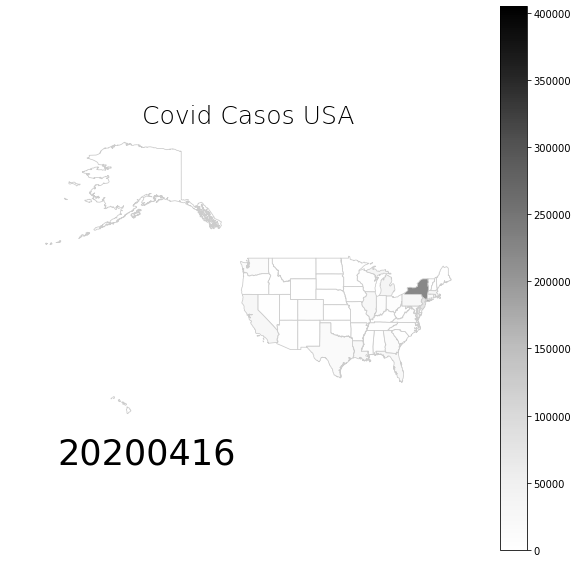

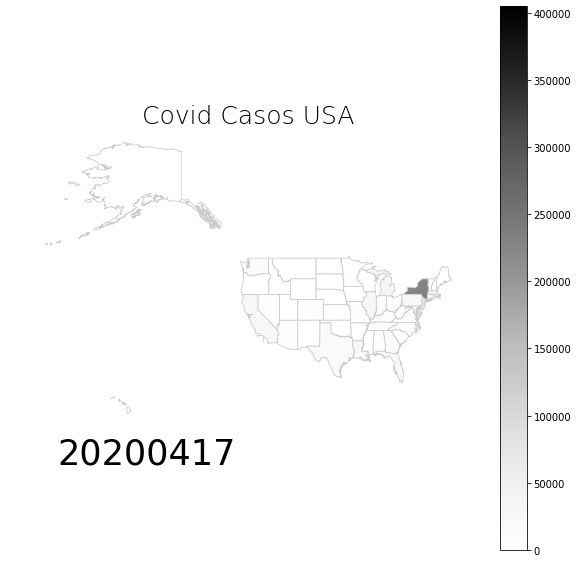

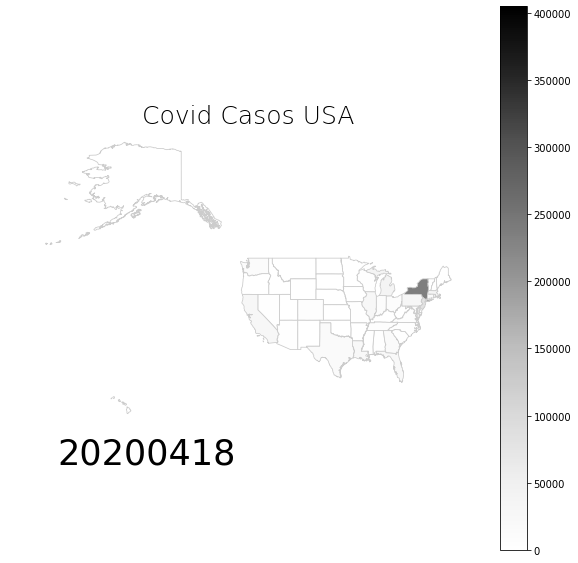

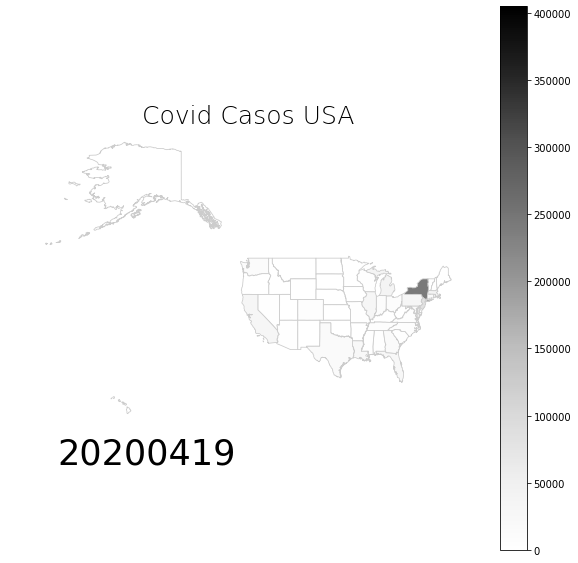

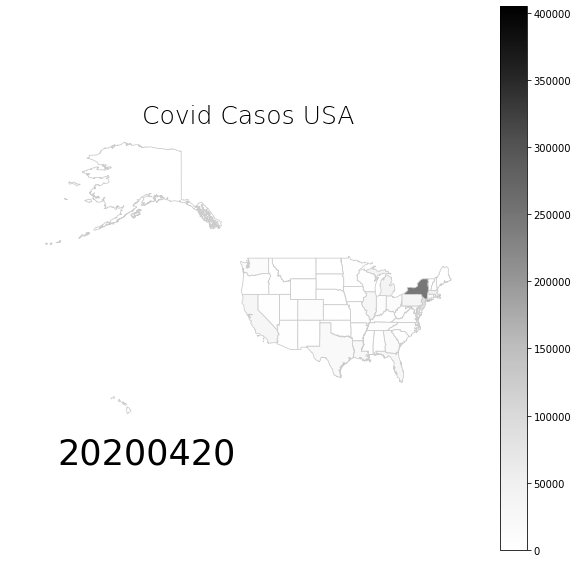

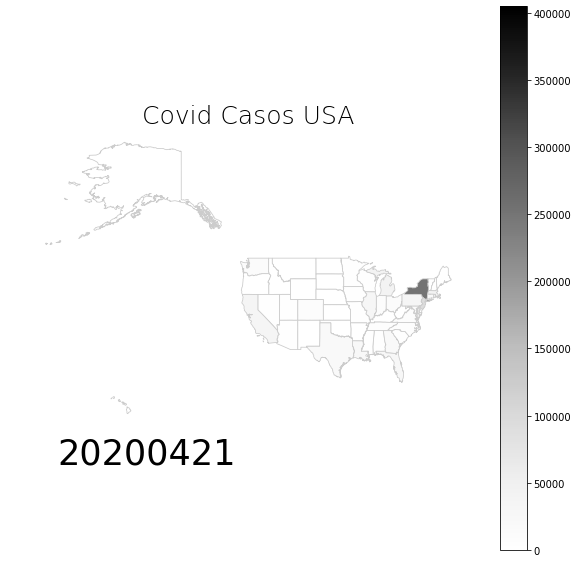

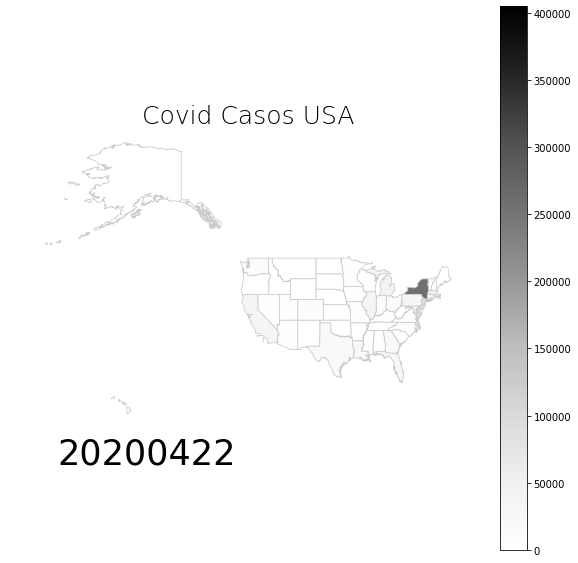

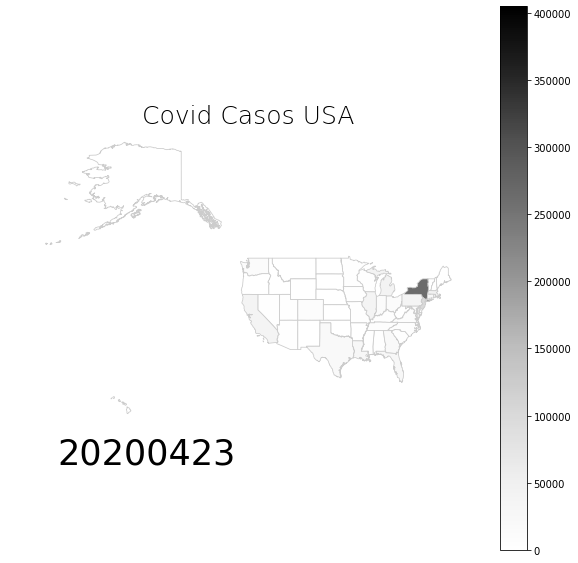

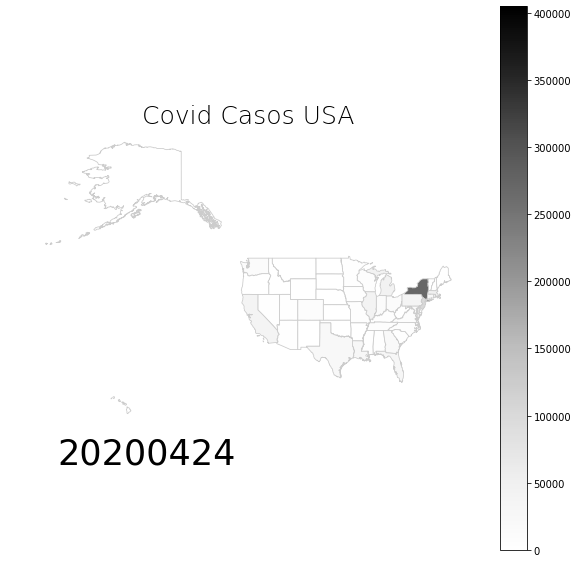

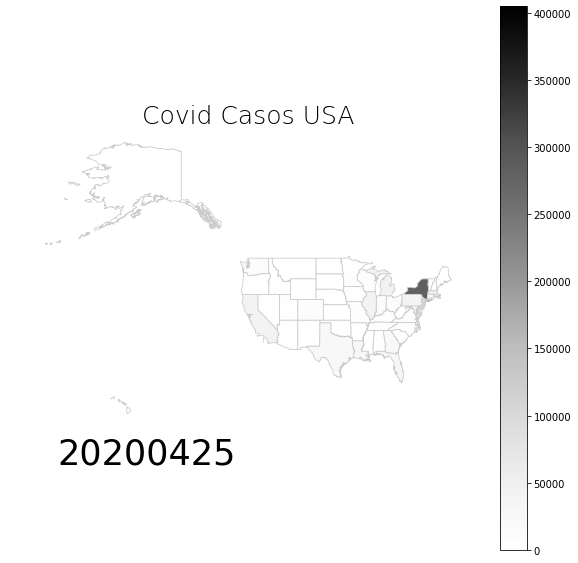

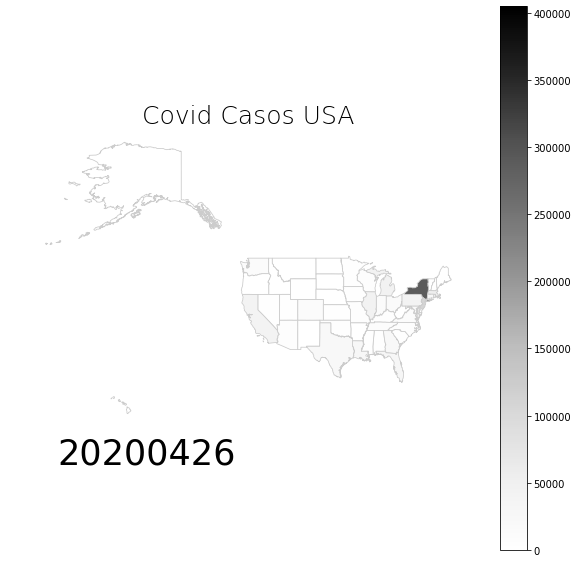

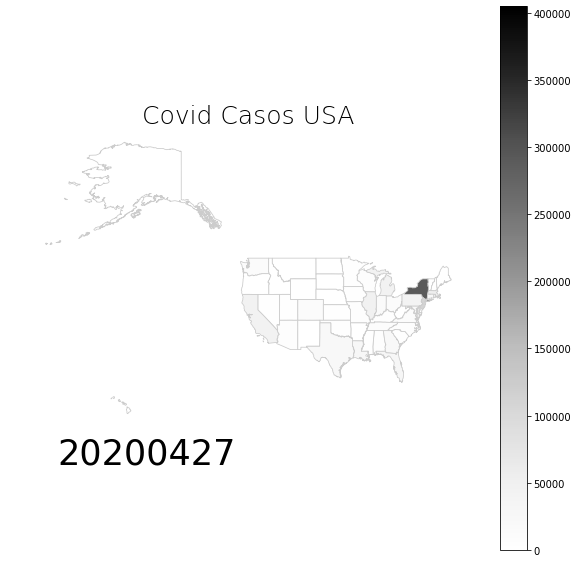

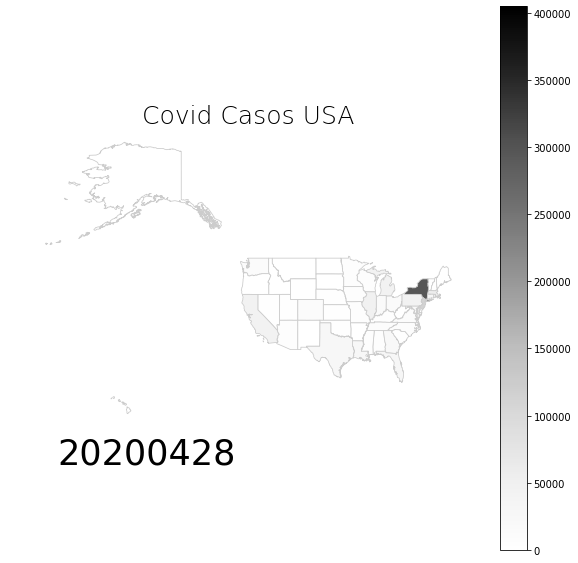

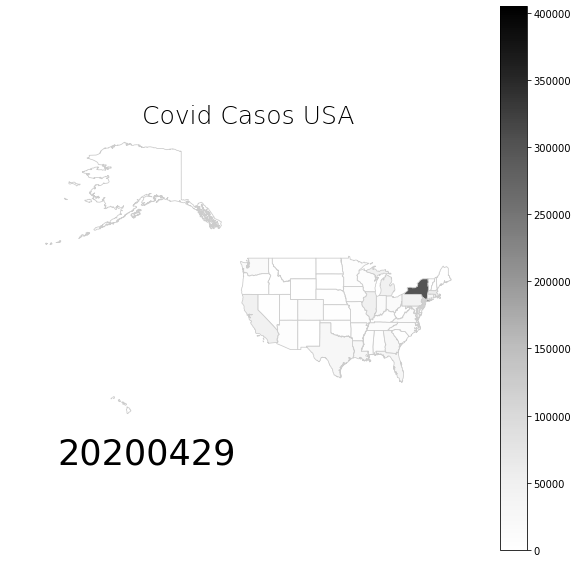

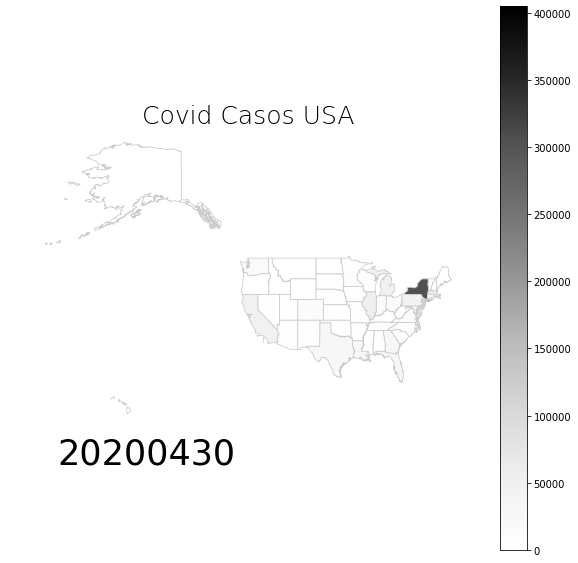

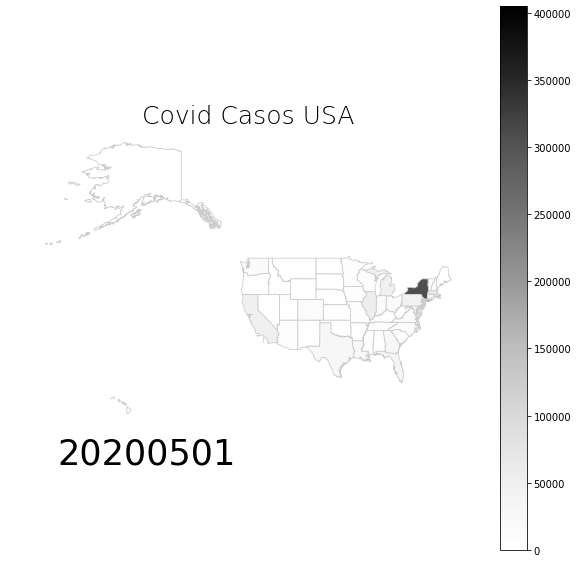

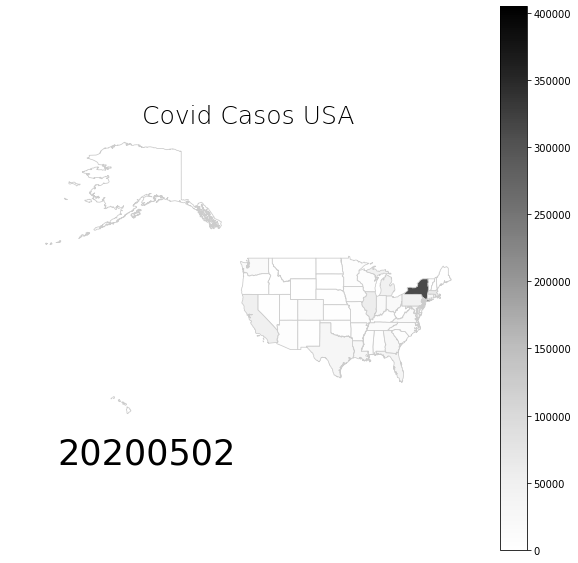

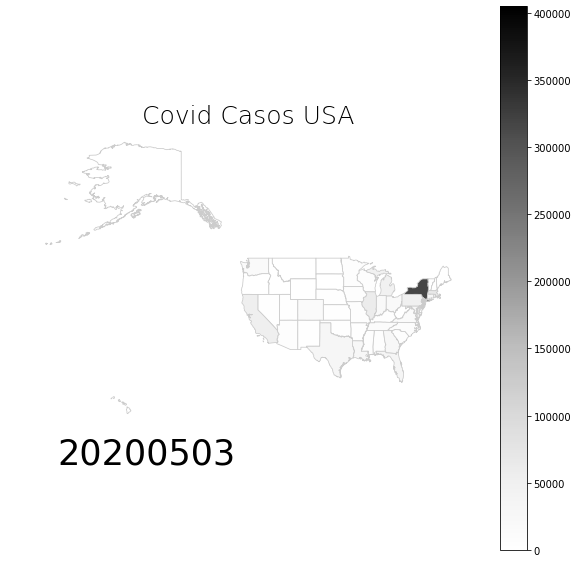

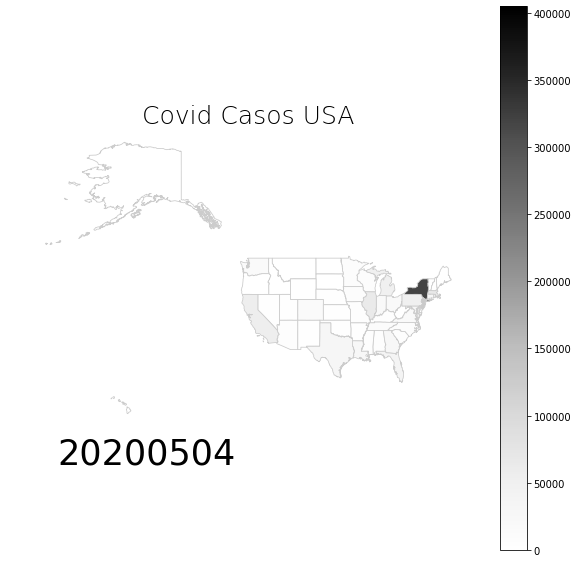

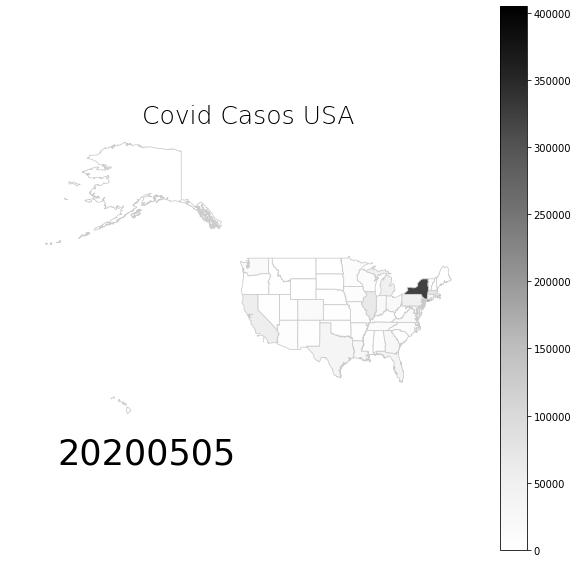

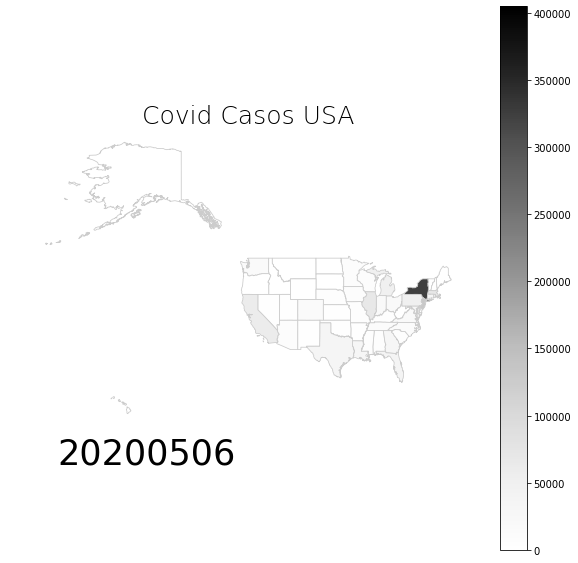

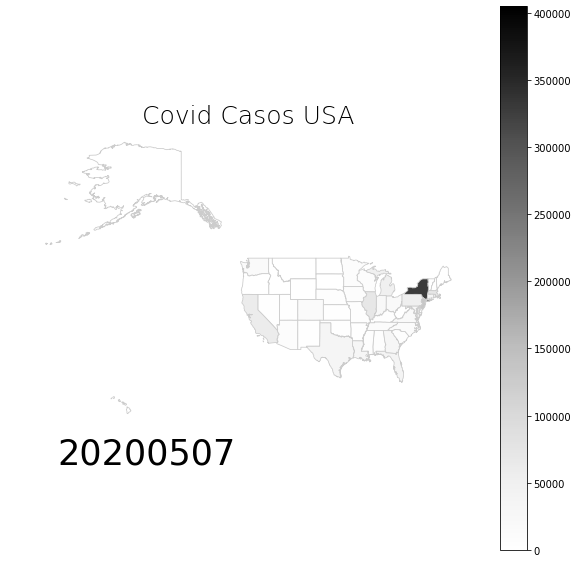

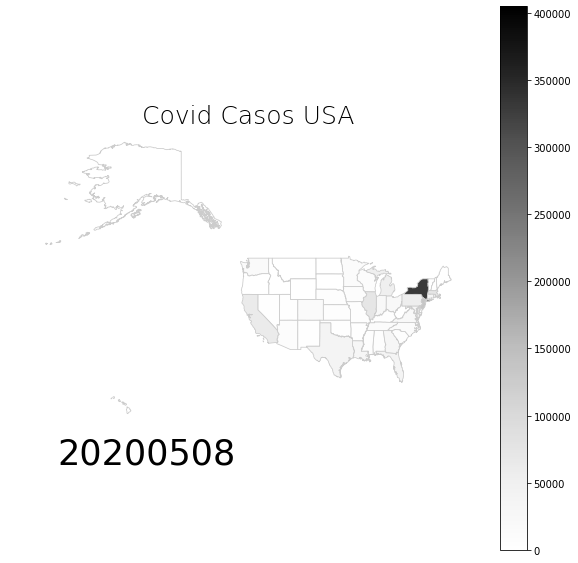

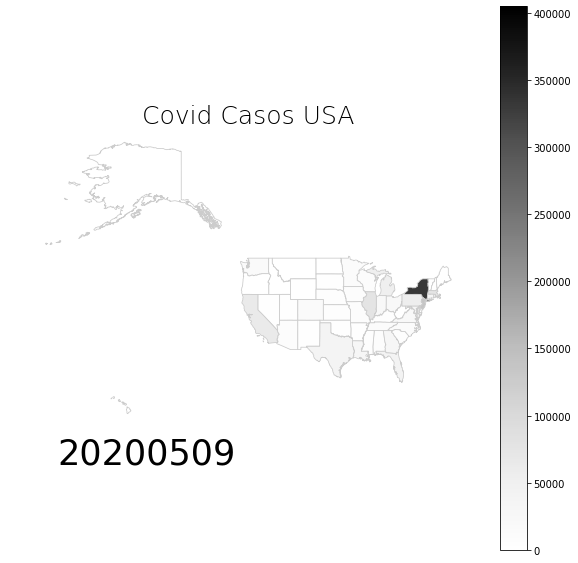

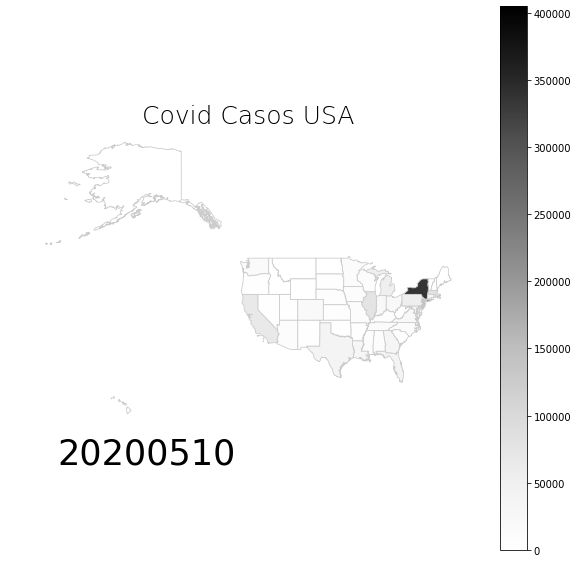

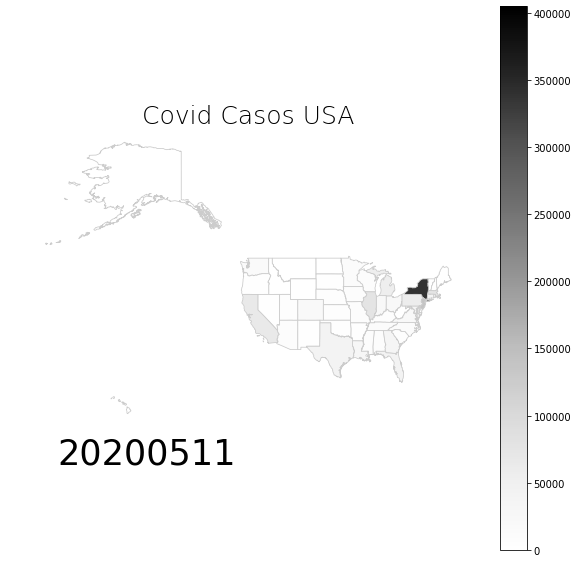

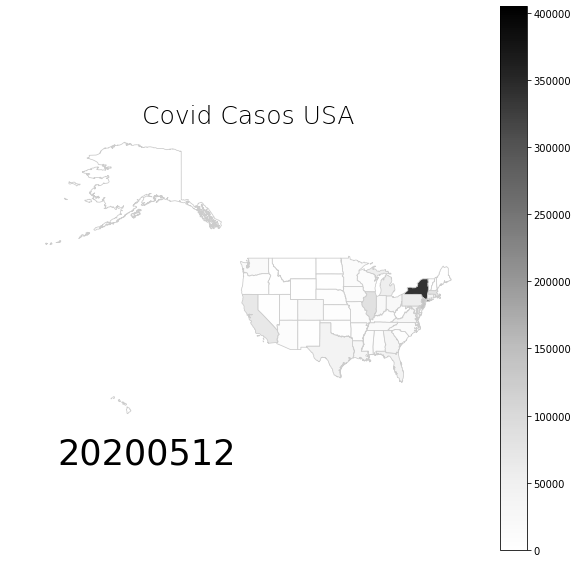

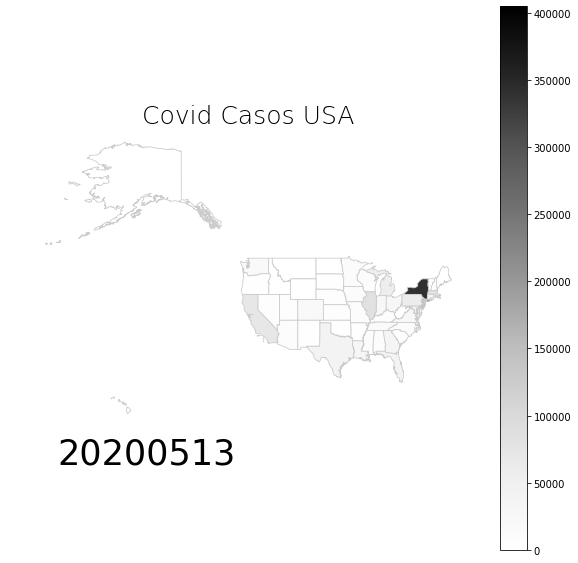

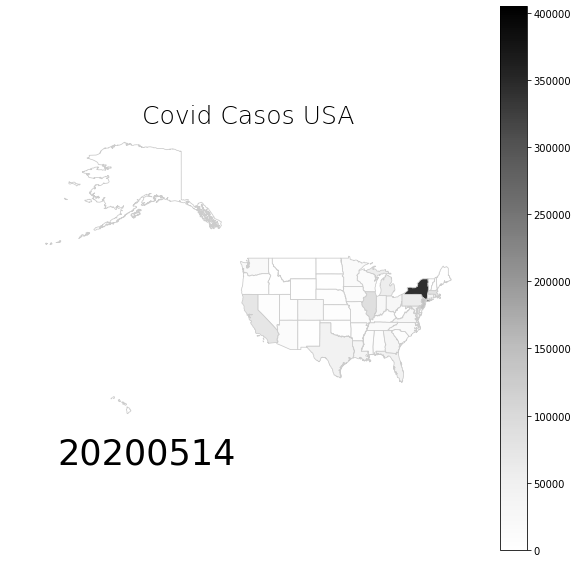

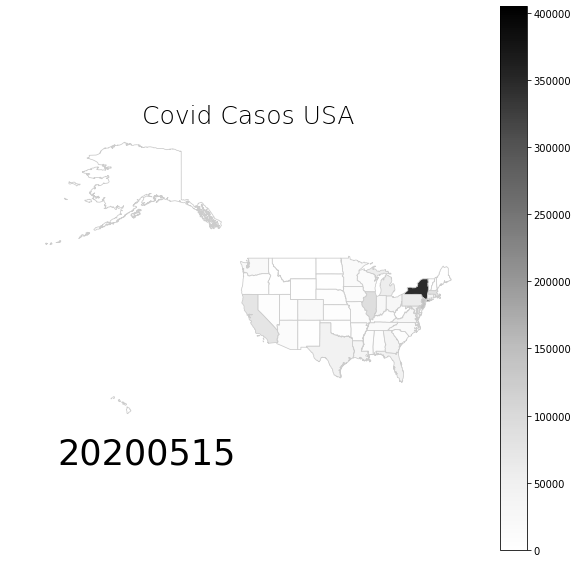

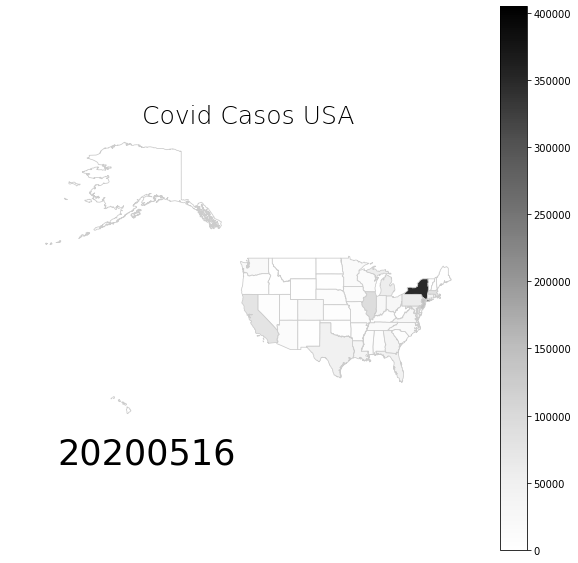

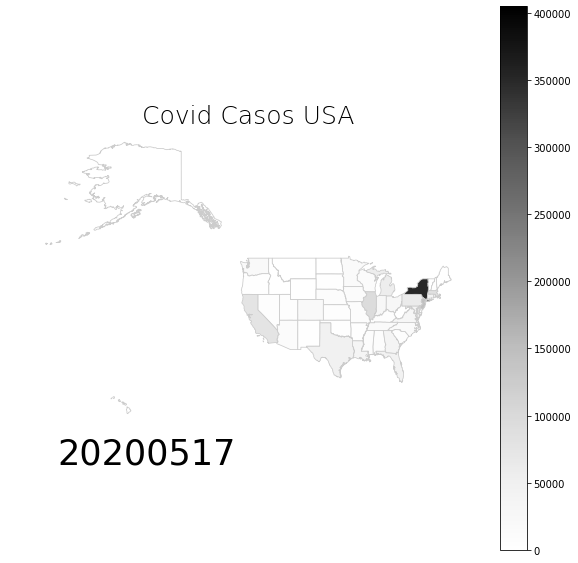

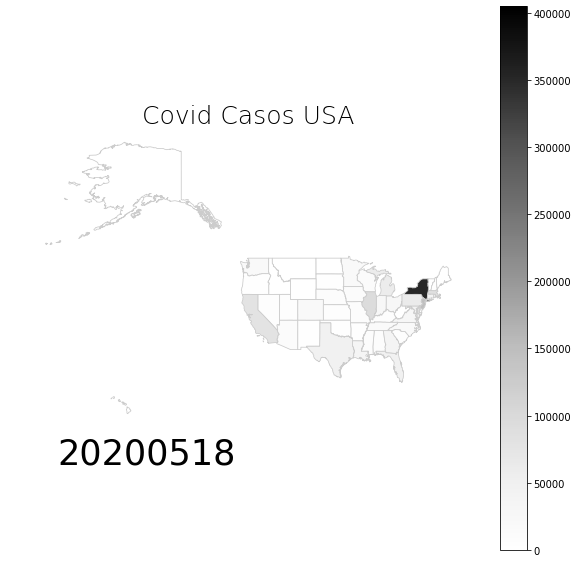

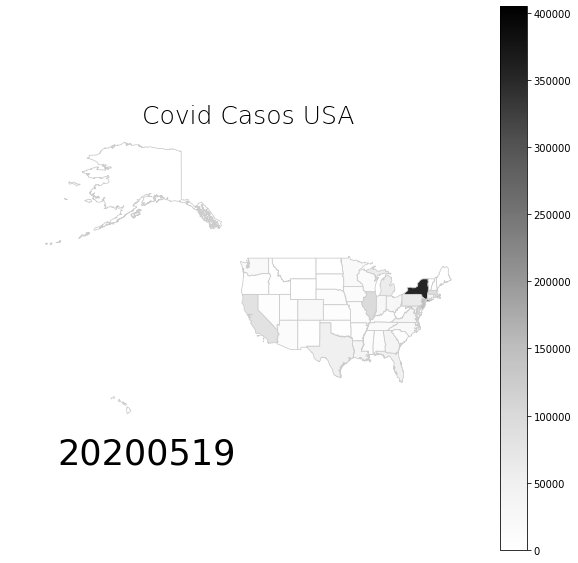

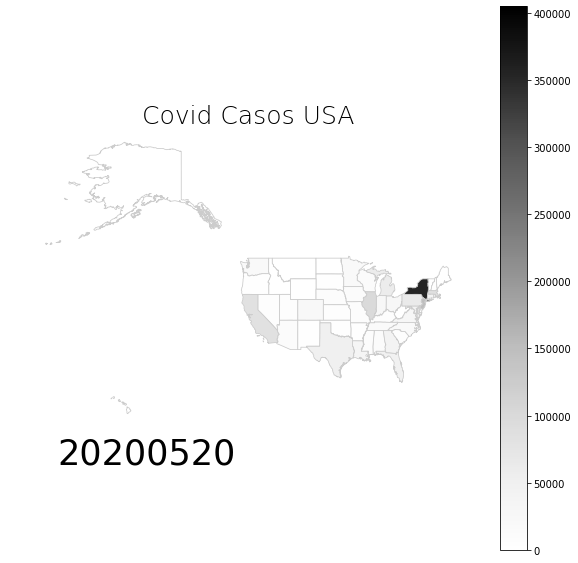

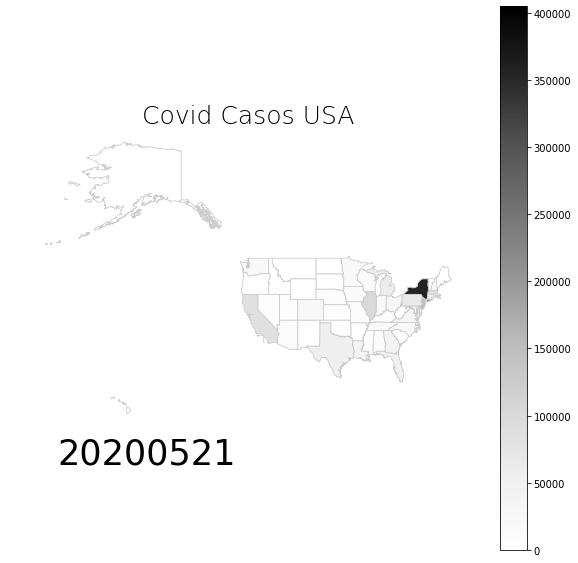

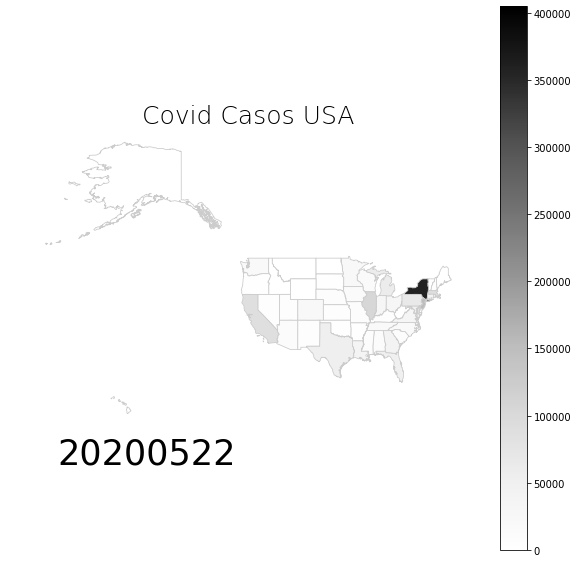

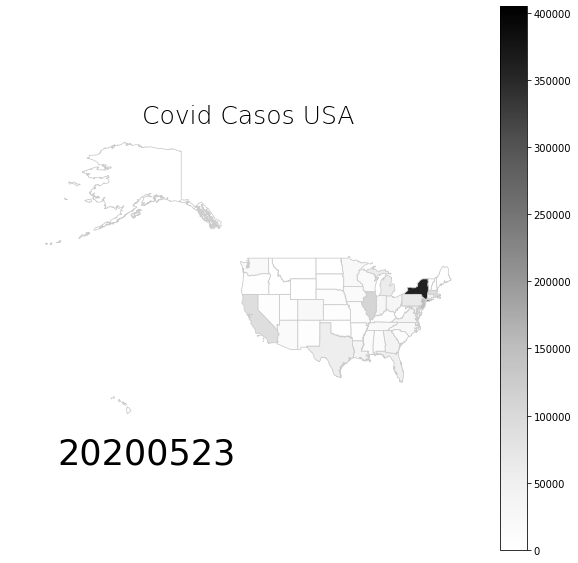

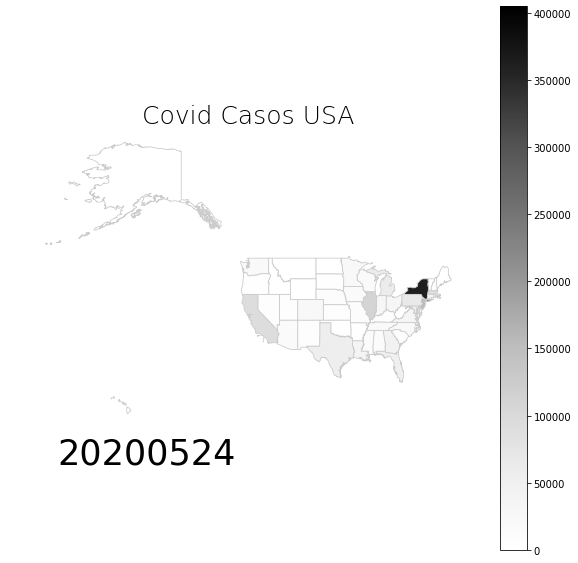

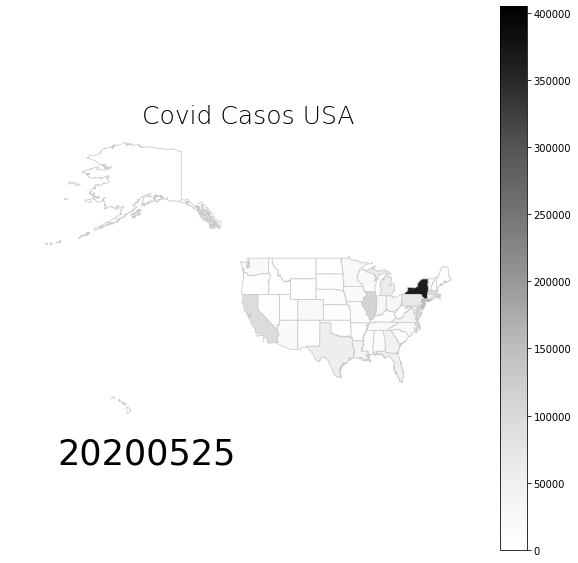

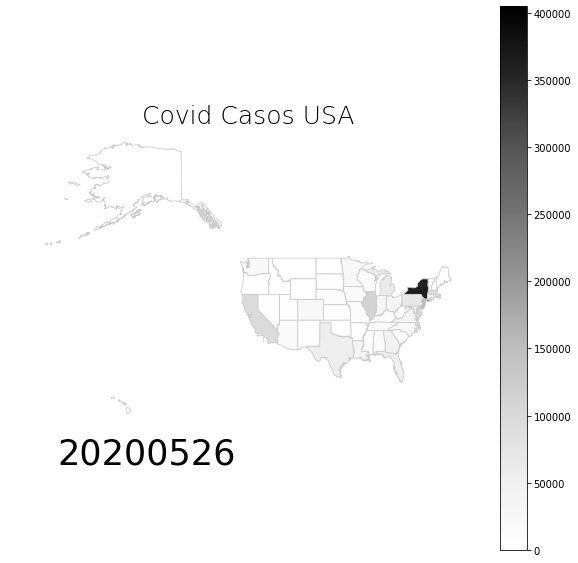

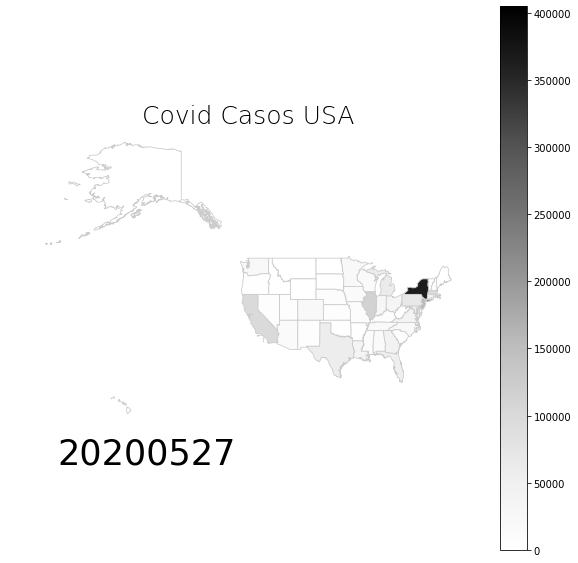

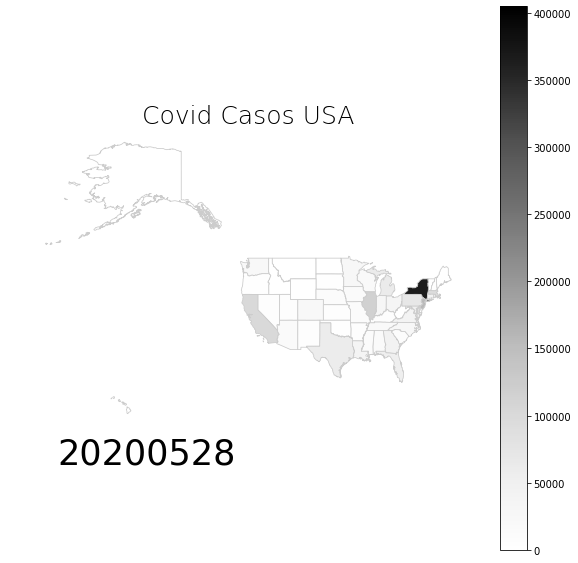

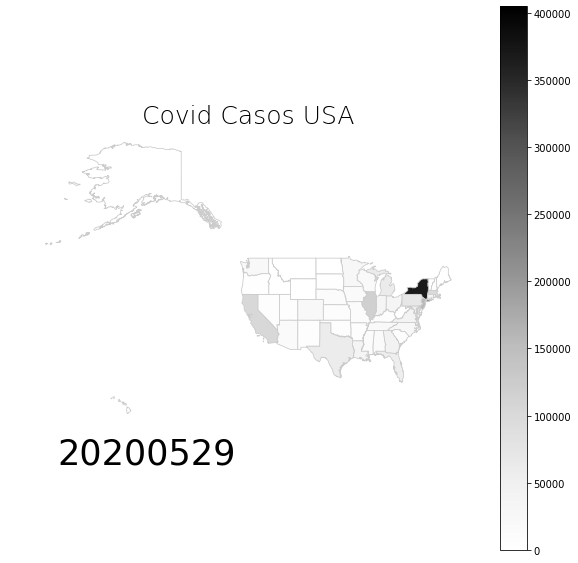

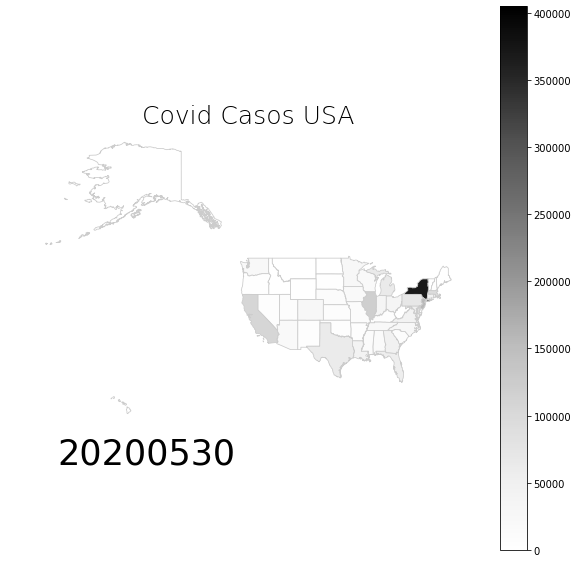

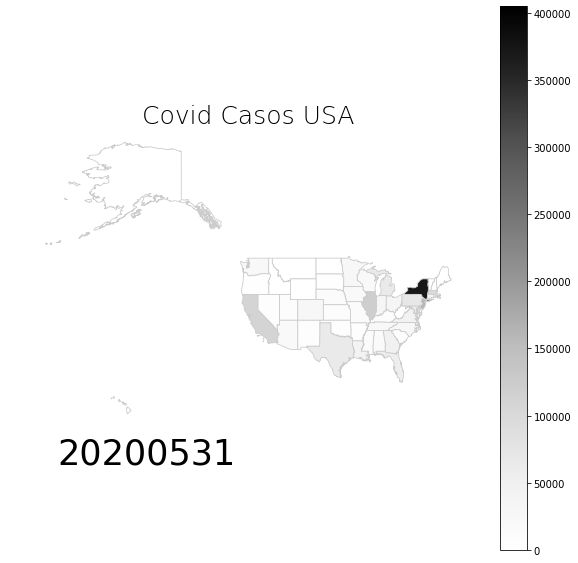

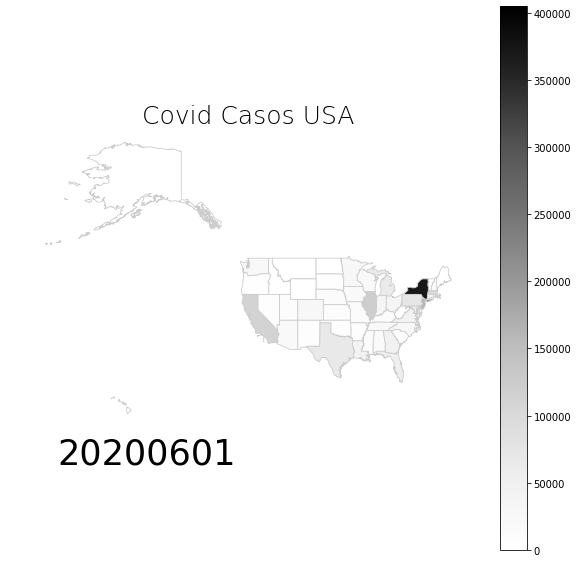

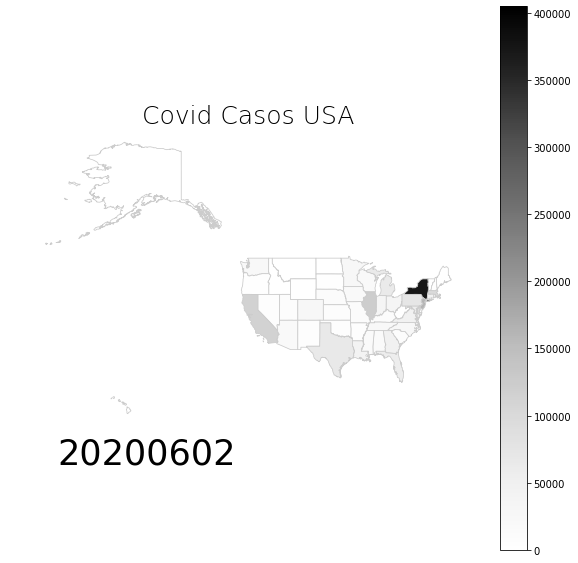

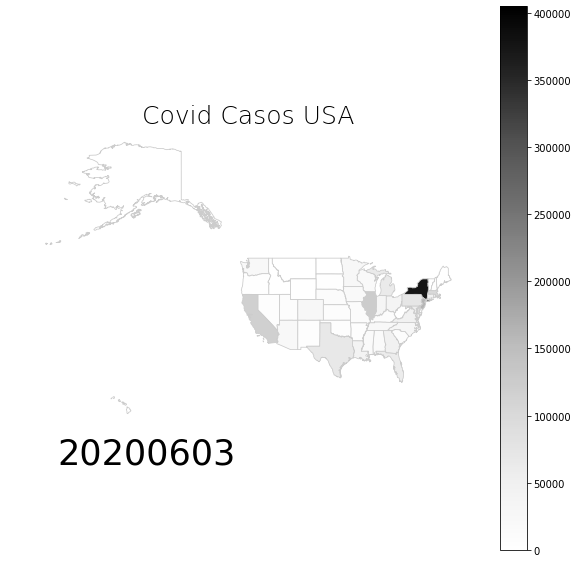

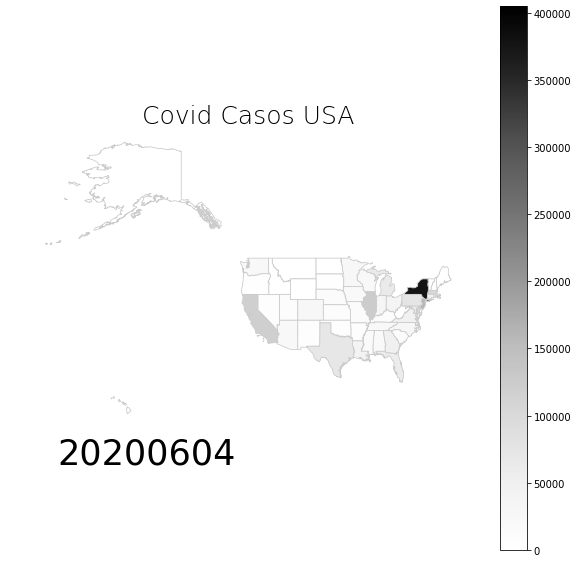

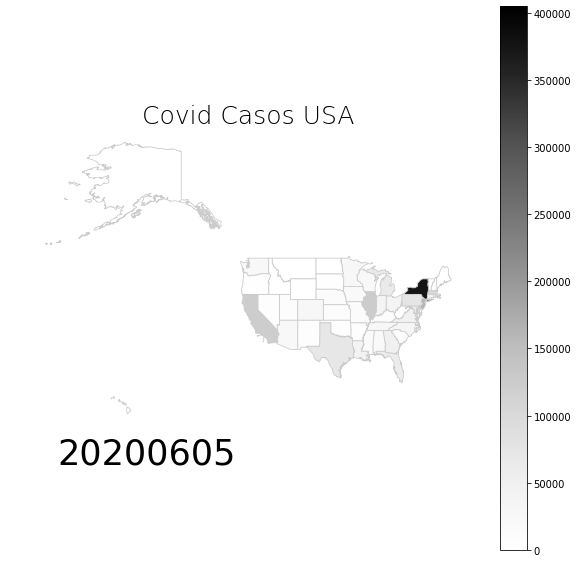

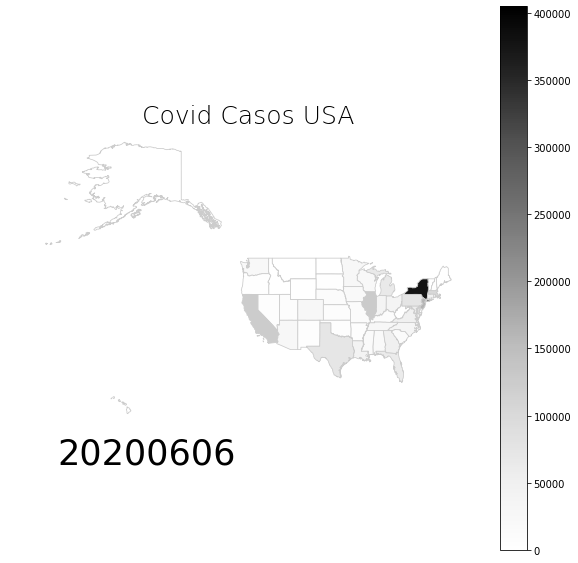

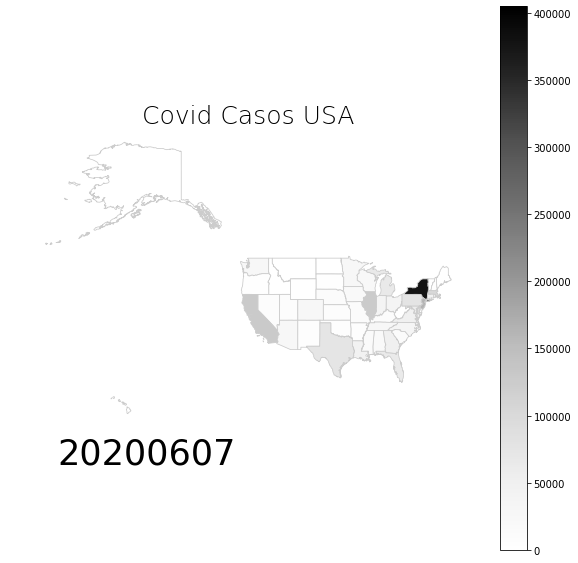

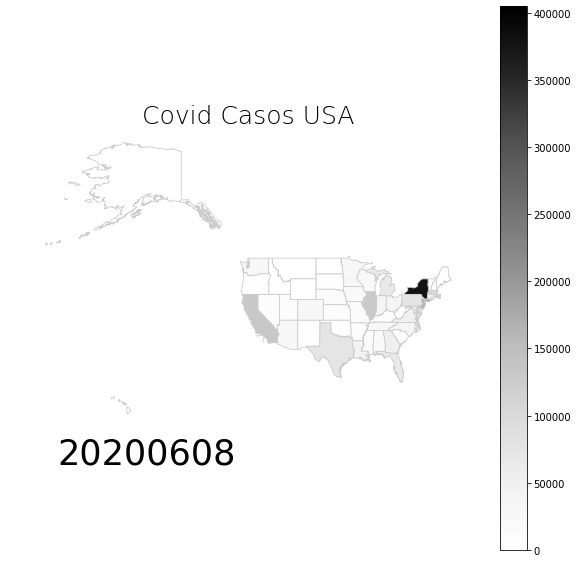

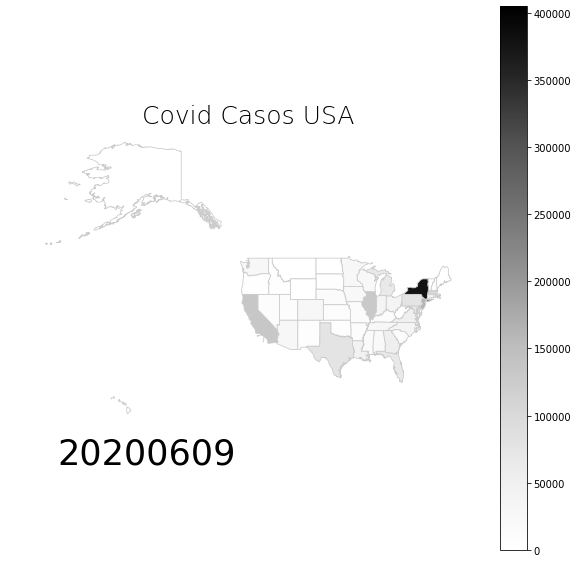

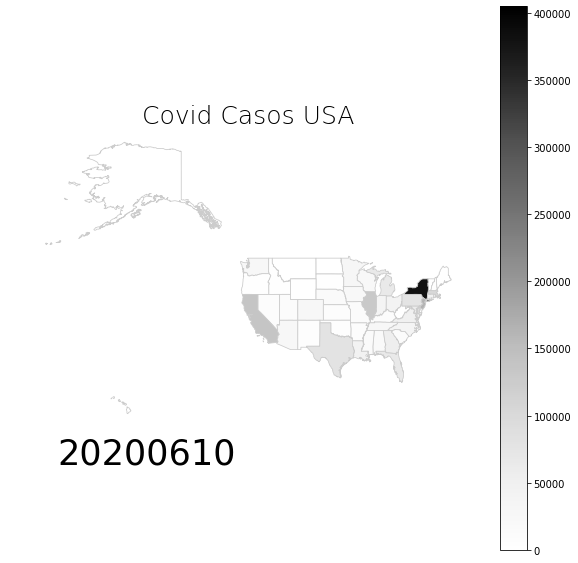

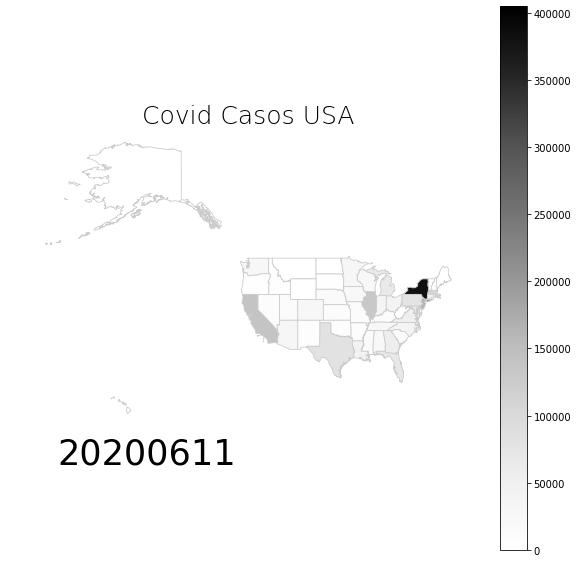

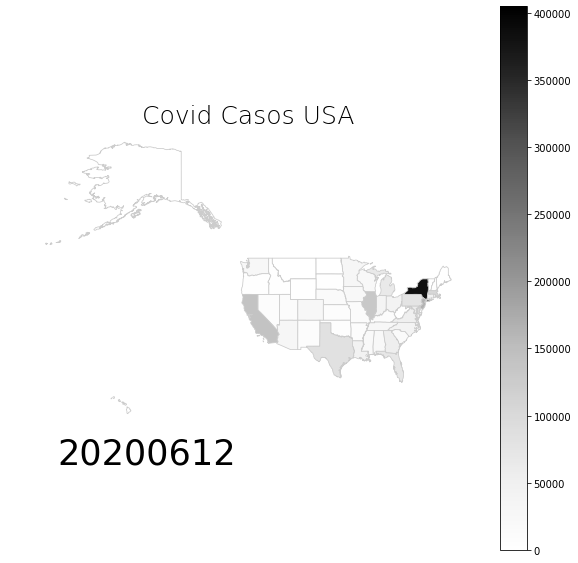

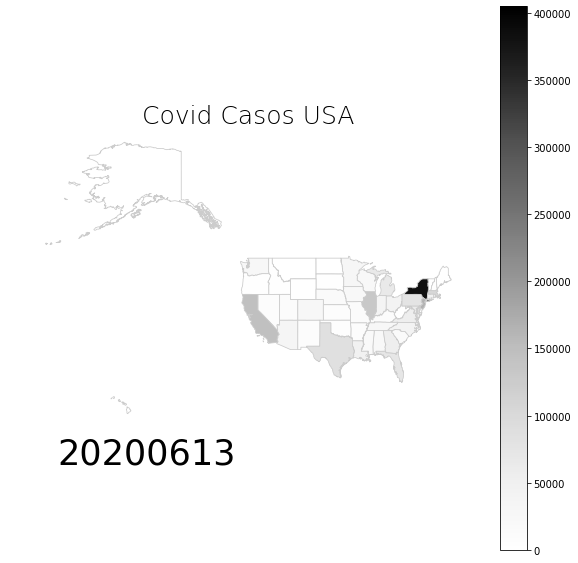

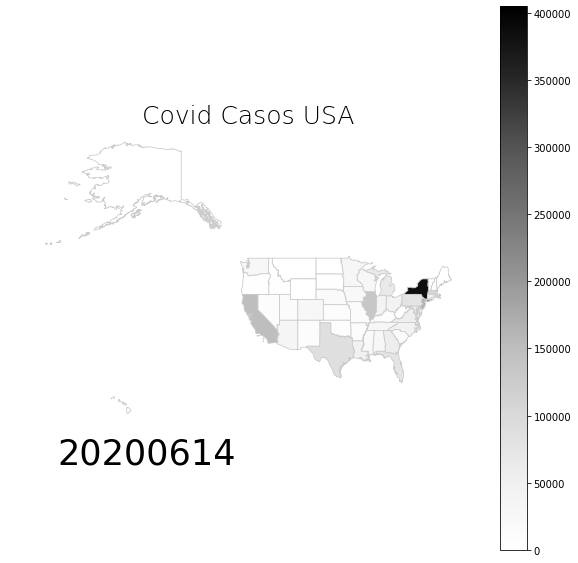

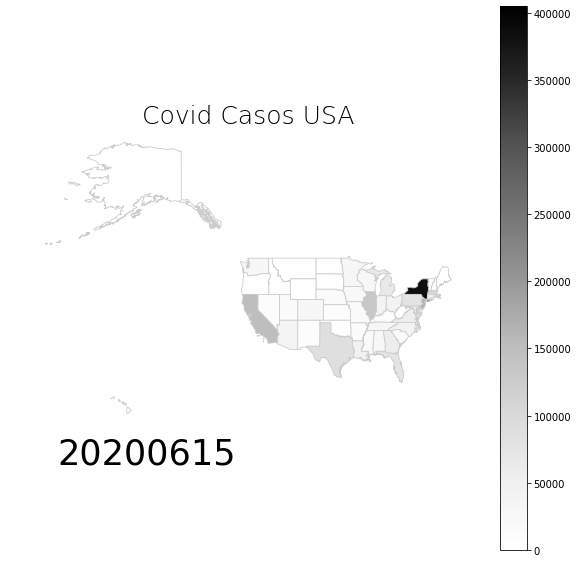

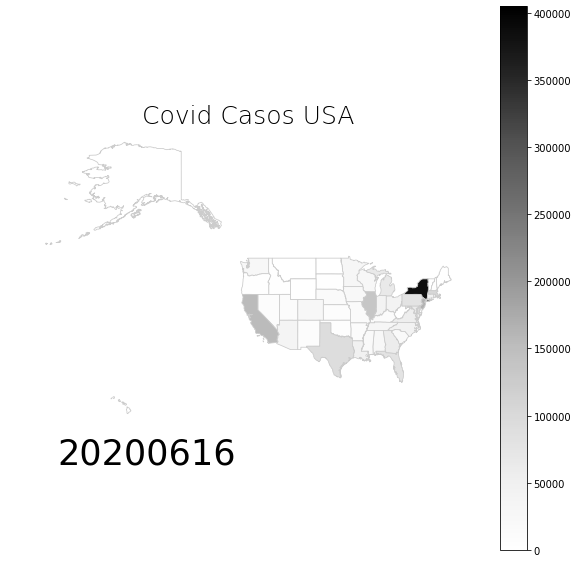

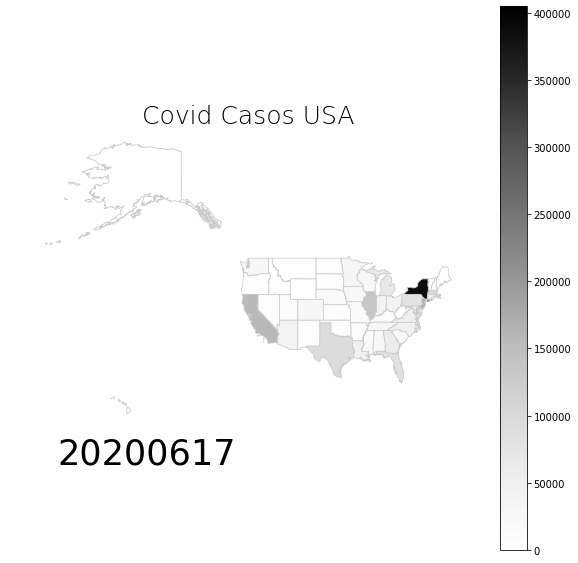

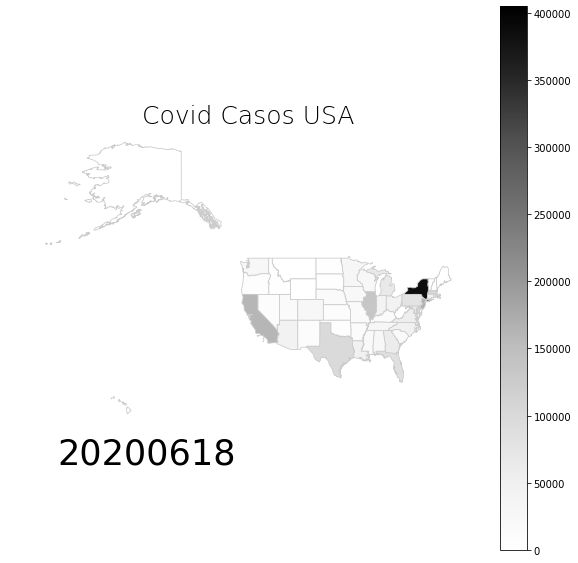

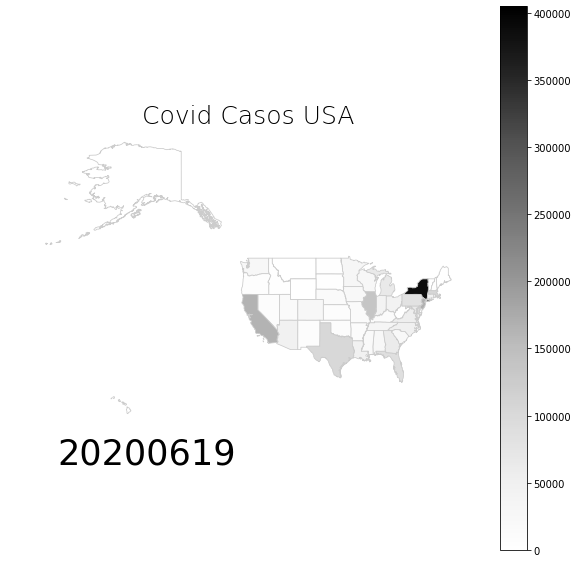

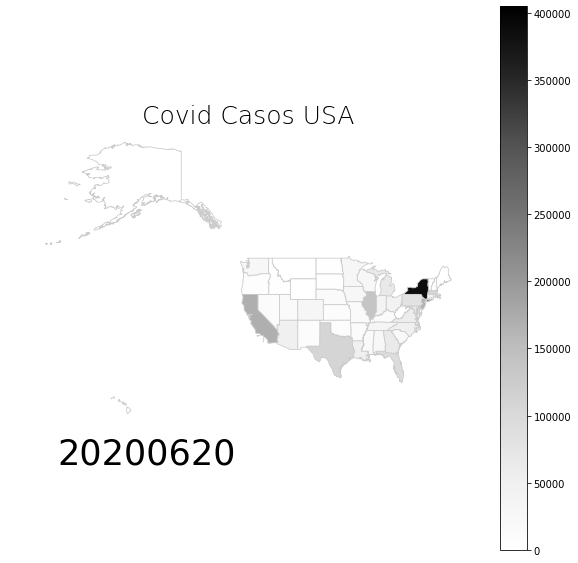

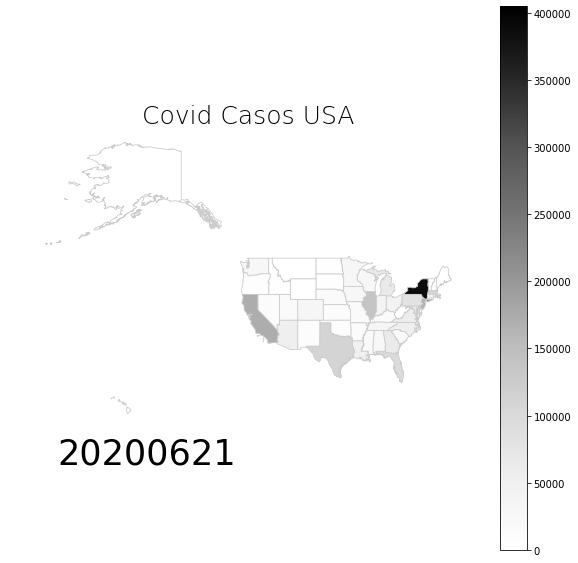

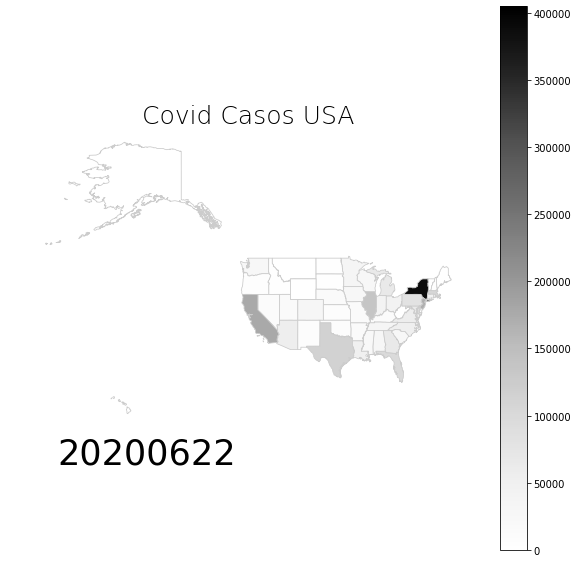

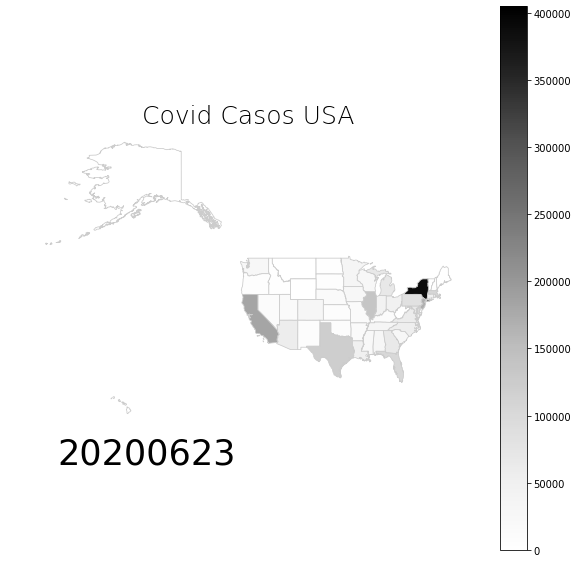

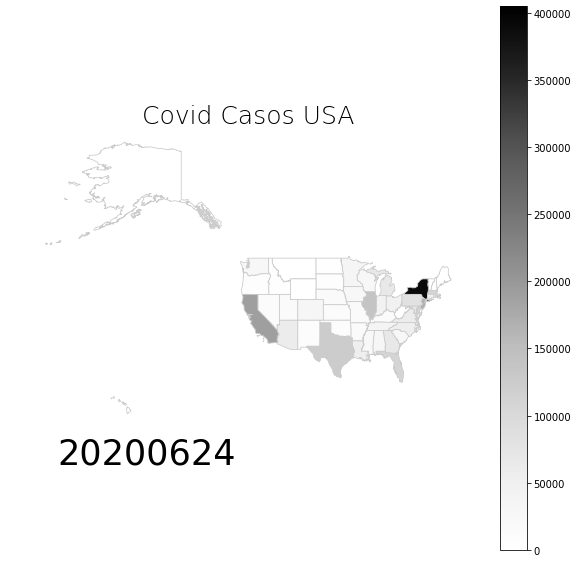

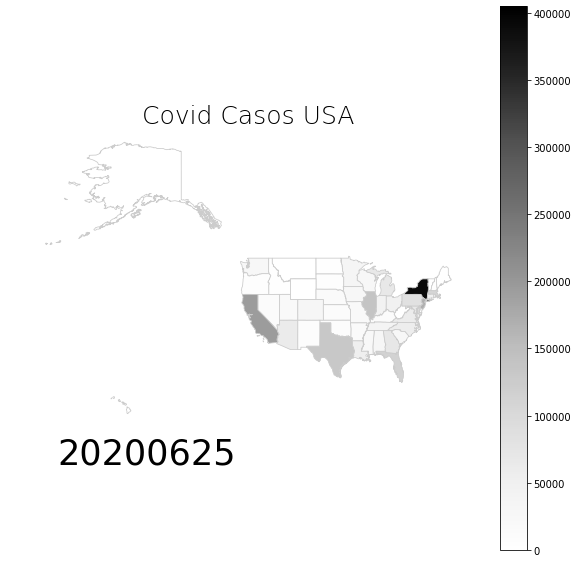

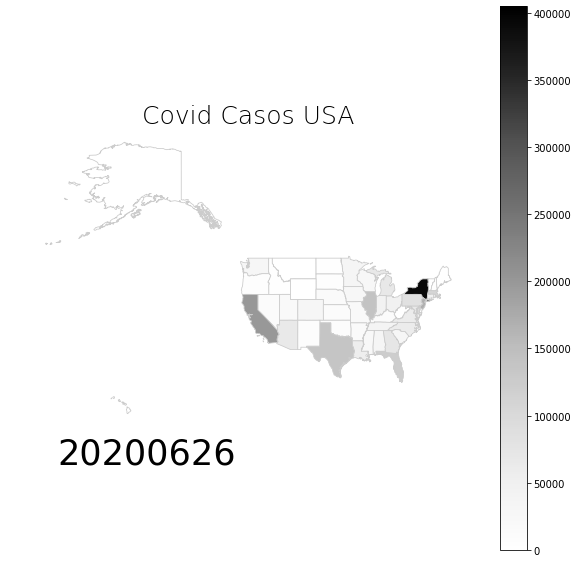

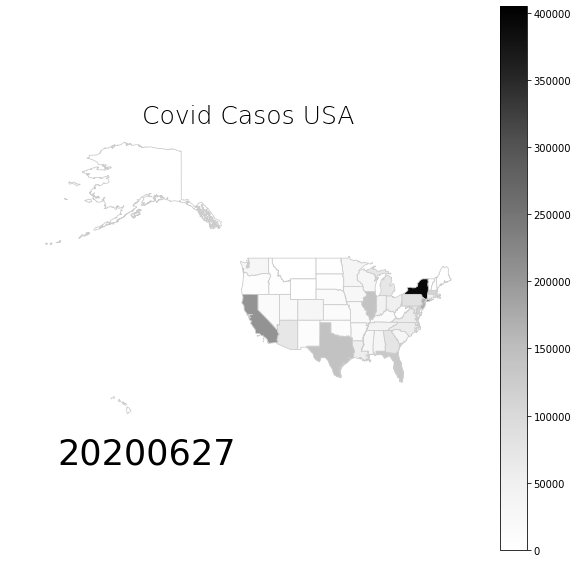

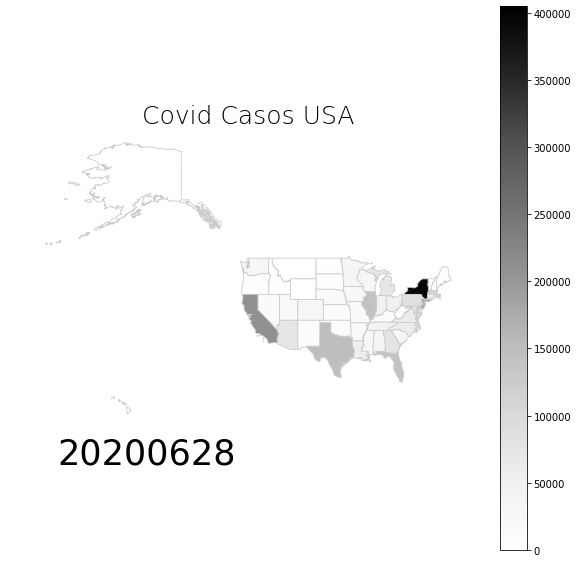

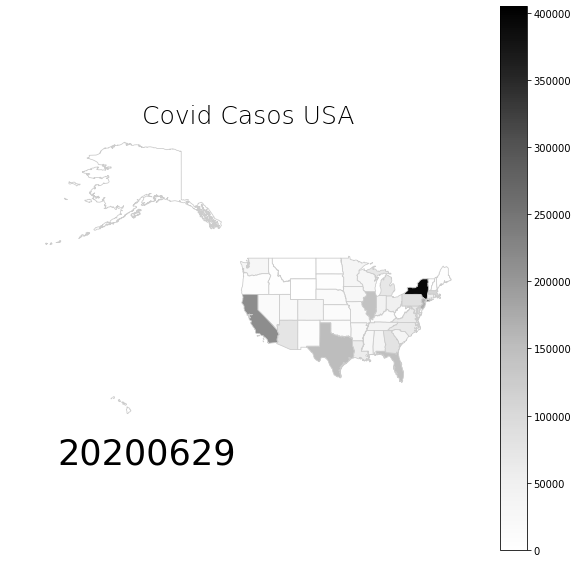

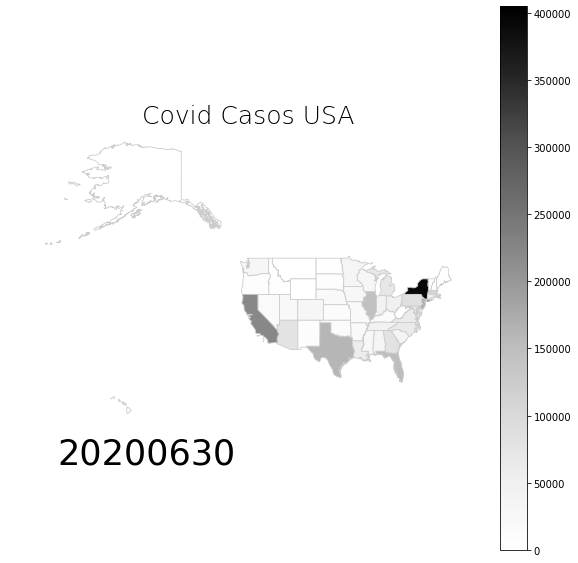

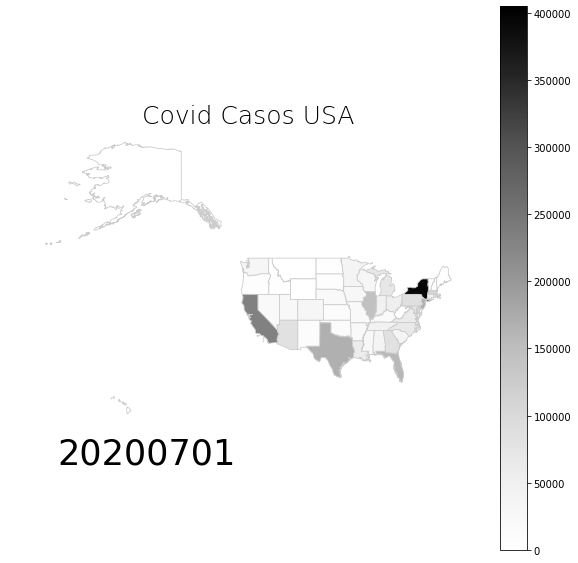

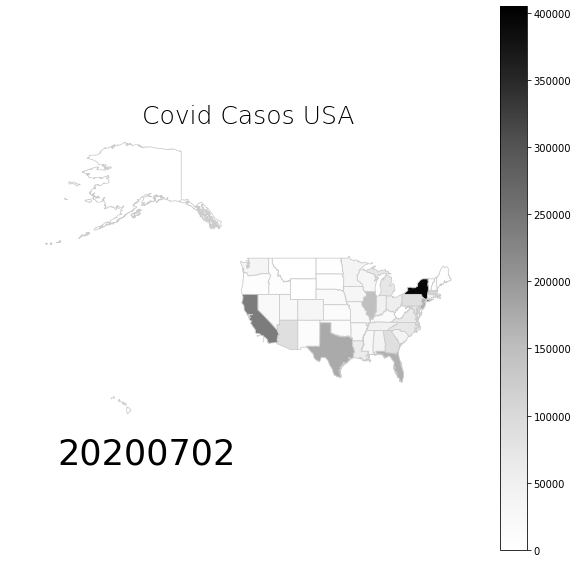

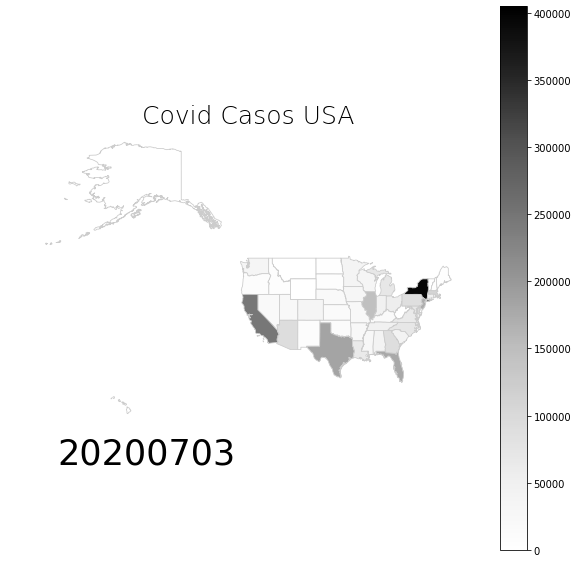

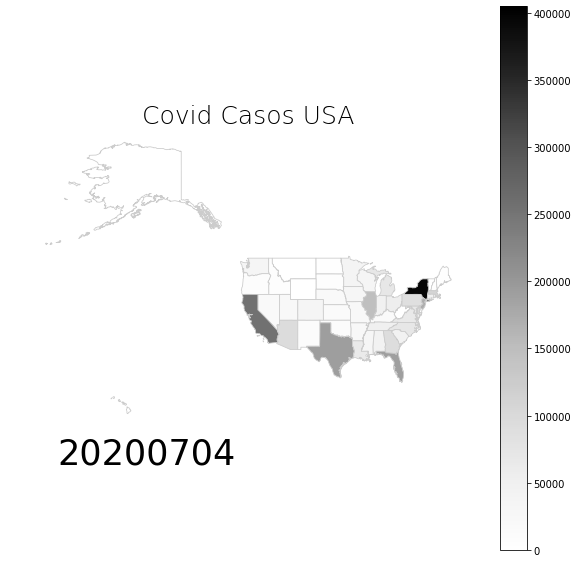

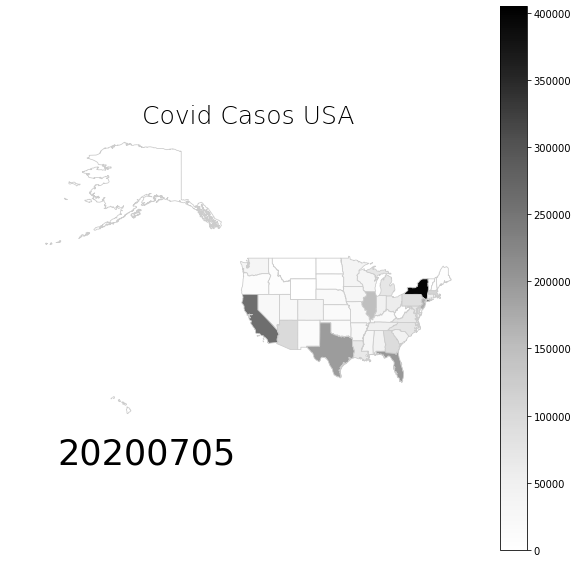

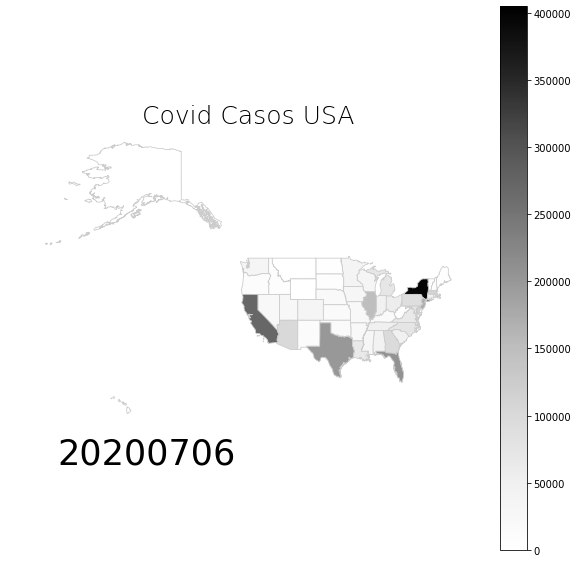

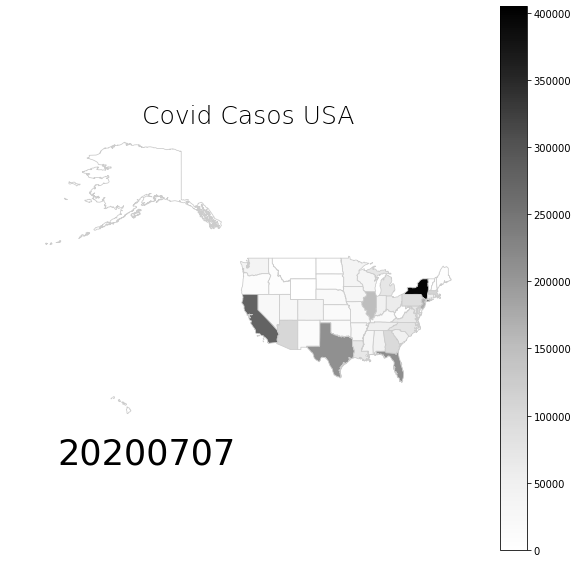

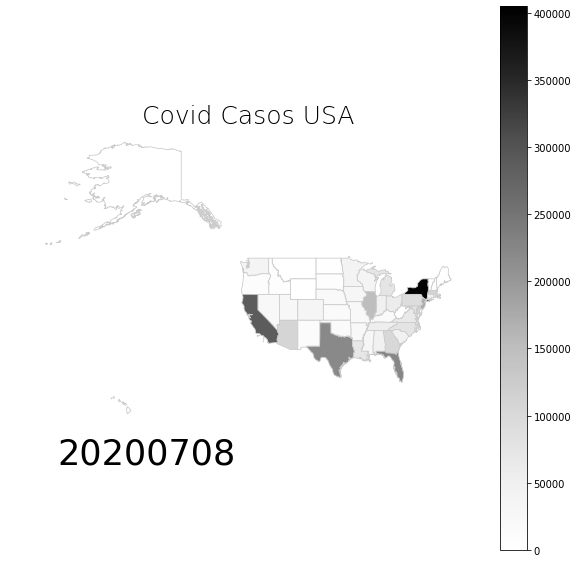

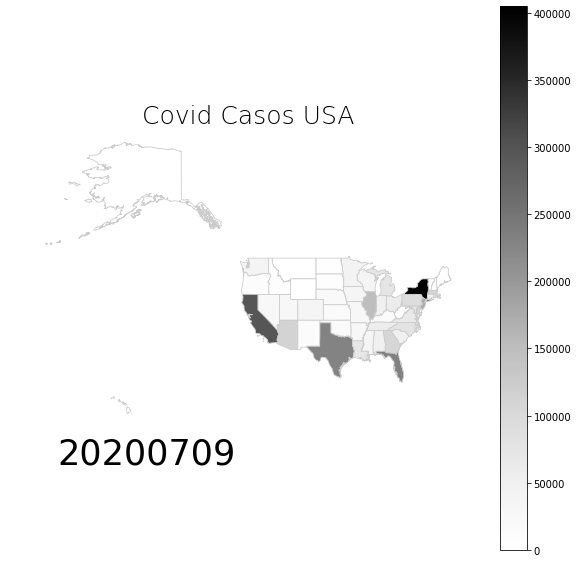

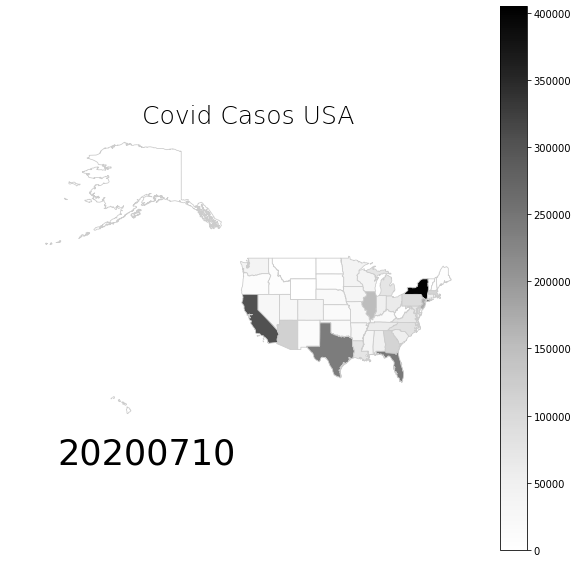

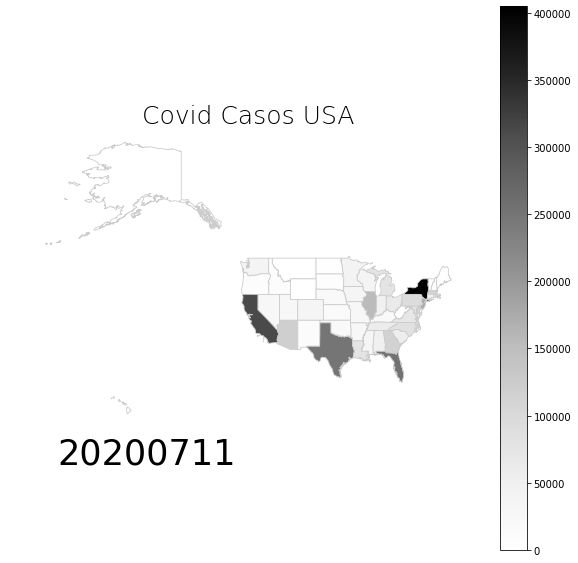

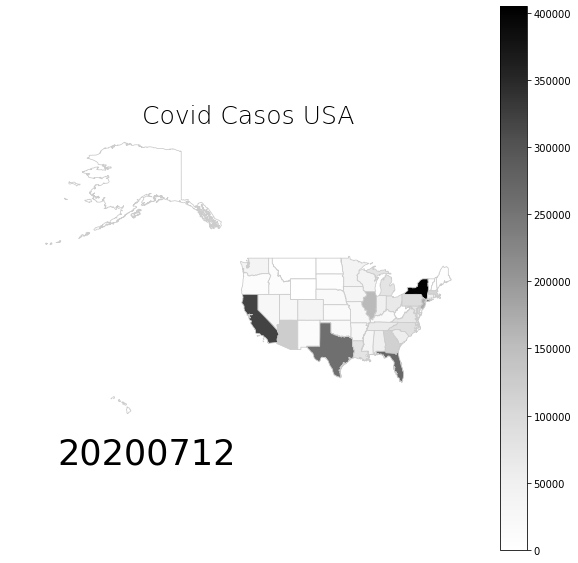

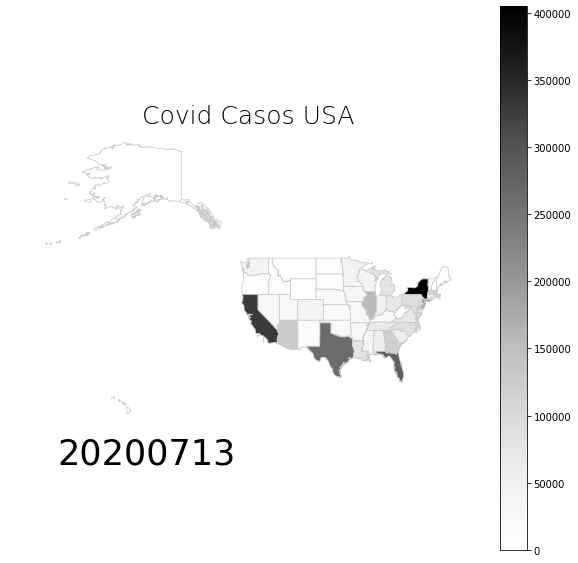

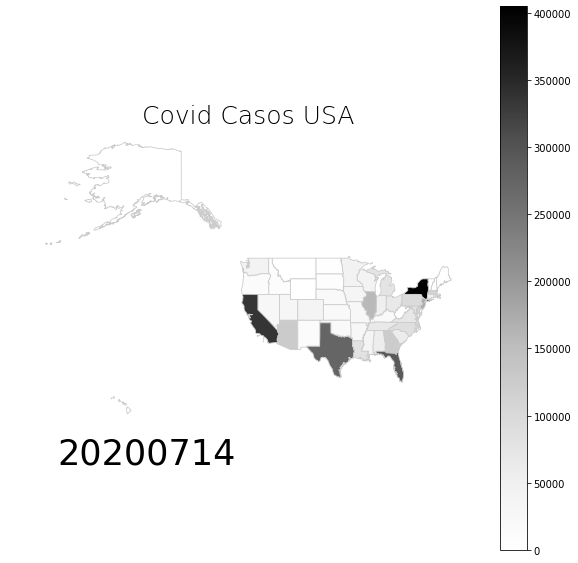

In [29]:
output_path = 'output_USA/maps'


# counter for the for loop
i = 0

list_dates=columnsCSV
list_dates.remove('state')
list_dates.reverse()

# set the min and max range for the choropleth map
vmin, vmax = 0, 405000

# start the for loop to create one map per year
for date in list_dates:
    
    # create map
    fig = df_total.plot(column=date, cmap='Greys', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, 
                       legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax)) # UDPATE: added plt.Normalize to keep the legend range the same for all maps
    
    # remove axis of chart
    fig.axis('off')
    
    # add a title
    fig.set_title('Covid Casos USA', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # create an annotation for the year
   
    # position the annotation to the bottom left
    fig.annotate(date,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, date+'_covid.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)